**A Decision Tree helps us to make decisions by mapping out different choices and their possible outcomes. It’s used in machine learning for tasks like classification and prediction**

<img src="../images/what_is_a_decision_tree.webp">
<img src="../images/types_of_decision_trees-.webp">

# 🌳 Decision Tree Classifier: Complete Guide

## 🧠 What is a Decision Tree?

Think of it like a **flowchart** you make when deciding what to wear:
- "Is it raining?" → Yes → "Take umbrella"
- "Is it raining?" → No → "No umbrella needed"

Decision trees make decisions by asking questions about features, and following branches based on answers.

---

- **Root Node**: Starting point representing the whole dataset.
- **Branches**: Lines connecting nodes showing the flow from one decision to another.
- **Internal Nodes**: Points where decisions are made based on data features.
- **Leaf Nodes**: End points of the tree where the final decision or prediction is made.

<img src="../images/Decision-tree.webp">

## 🎯 How It Works - Basic Concept

### Step 1: Root Node
- Starts with all data at the top
- Asks the **most important question** first which is derived from the dataset's features.

### Step 2: 
- **Ask Yes/No Questions**: From the root, the tree asks a series of yes/no questions to split the data into subsets based on specific attributes.

### Step 3: Splitting
- Each question leads to different branches:
  - If the answer is yes, the tree follows one path.
  - If the answer is no, the tree follows another path.

- Each split creates child nodes

### Step 3: Repeat
- Each child node asks another question
- Continues Splitting until there are no more useful questions to ask leading to the leaf node where the final decision or prediction is made.


## 🔧 Step-by-Step Example

Let's predict if someone will buy a product:

| Age | Income | Education | Buy? |
|-----|--------|-----------|------|
| 25  | High   | College   | Yes  |
| 35  | Low    | High      | No   |
| 45  | High   | College   | Yes  |
| 20  | Low    | High      | No   |

### Decision Process:
```text
Start: [4 samples, 2 Yes, 2 No]
↓
Income = High?
├─ Yes → [2 samples, 2 Yes] → "Buy = Yes"
└─ No → [2 samples, 2 No] → "Buy = No"
```

## Splitting Criteria in Decision Trees :

In a Decision Tree, the process of splitting data at each node is important. The splitting criteria finds the best feature to split the data on. Common splitting criteria include Gini Impurity and Entropy.


- **Gini Impurity**: This criterion measures how "impure" a node is. The lower the Gini Impurity the better the feature splits the data into distinct categories.

- **Entropy**: This measures the amount of uncertainty or disorder in the data. The tree tries to reduce the entropy by splitting the data on features that provide the most information about the target variable.

These criteria help decide which features are useful for making the best split at each decision point in the tree.


## Pruning in Decision Trees

- Pruning is an important technique used to prevent overfitting in Decision Trees. Overfitting occurs when a tree becomes too deep and starts to memorize the training data rather than learning general patterns. This leads to poor performance on new, unseen data.

- This technique reduces the complexity of the tree by removing branches that have little predictive power. It improves model performance by helping the tree generalize better to new data. It also makes the model simpler and faster to deploy.

- It is useful when a Decision Tree is too deep and starts to capture noise in the data.


## Applications of Decision Trees
1. Loan Approval in Banking
2. Medical Diagnosis
3. Predicting Exam results in Education
4. Cutomer Churn Prediction
5. Fraud Detection



---

## 🧮 Key Concepts

### 1. Information Gain
- Measures how much a question "improves" the data
- Higher gain = better question
- Formula: `Information Gain = Entropy(parent) - Weighted Average of Child Entropy`

### 2. Gini Impurity
- Measures how "mixed" the data is
- `Gini = 1 - Σ(pi²)` where `pi` = proportion of class i
- Lower Gini = better split

### 3. Entropy
- Measures randomness in data
- `Entropy = -Σ(pi * log2(pi))`
- Higher entropy = more mixed data

---

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../datasets/loan_approval_data.csv")

X = df.drop("Approved", axis=1)
y = df["Approved"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# Initializing tree
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42, class_weight='balanced')

# Training our Tree
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [5]:
# Evaluations
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}\n")
print(f"Accuracy: {acc}\n")
print(f"Recall: {recall}\n")
print(f"F1-Score: {f1:.3f}")

Confusion Matrix:
[[61 33]
 [28 78]]

Accuracy: 0.695

Recall: 0.7358490566037735

F1-Score: 0.719


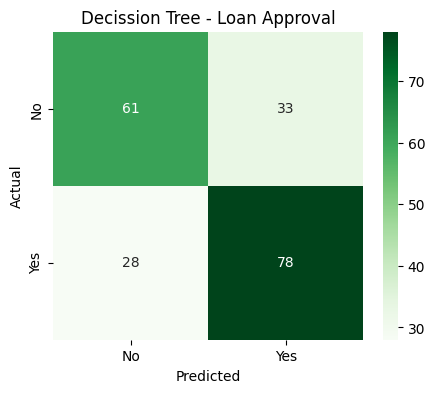

In [6]:
# Plotting Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"],
)
plt.title("Decission Tree - Loan Approval")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

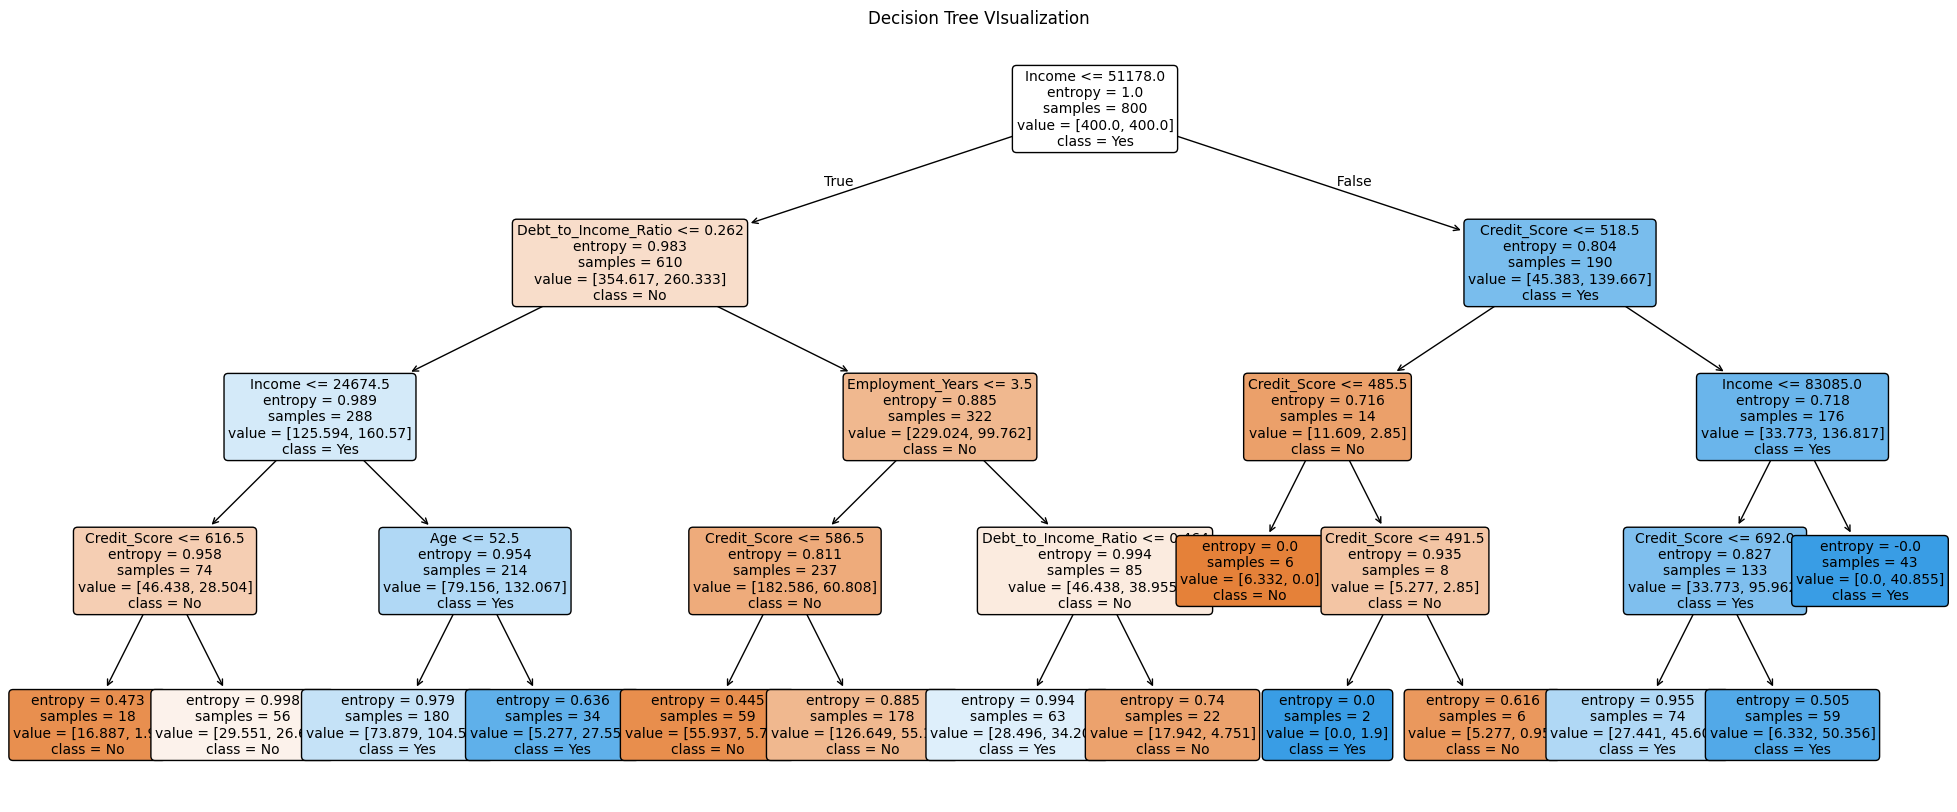

In [7]:
# Visualizing Tree
plt.figure(figsize=(25, 10))
plot_tree(
    tree,
    filled=True,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree VIsualization")
plt.show()